In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import MinMaxScaler, StandardScaler

sns.set(style='darkgrid', palette='viridis', context='talk')

In [2]:
import datetime

In [3]:
datetime.date.today()

datetime.date(2022, 6, 15)

# Import

In [4]:
vivarium-ecoli/out/fbagd/futile_cycle_testing_1000_2022-05-26

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1144357766.py, line 1)

In [5]:
entry = 'futile_cycle_testing_1000_2022-05-26'
folder = f'../out/fbagd/{entry}/'

In [6]:
output = np.load(folder + 'output.npy',allow_pickle='TRUE').item()
output = output['agents']['0']
fba = output['listeners']['fba_results']
mass = output['listeners']['mass']
bulk = pd.DataFrame(output['bulk'])

In [7]:
s_matrix = np.load(folder + 's_matrix.npy',allow_pickle='TRUE')
stoichiometry = np.load(folder + 'stoichiometry.npy',allow_pickle='TRUE')

In [8]:
fba.keys()

dict_keys(['estimated_fluxes', 'estimated_homeostatic_dmdt', 'target_homeostatic_dmdt', 'target_kinetic_fluxes', 'estimated_exchange_dmdt', 'estimated_all_dmdt', 'maintenance_target', 'solution_fluxes', 'solution_dmdt', 'solution_residuals', 'time_per_step'])

In [9]:
times = [time - fba['time_per_step'][1] for time in fba['time_per_step'][1:]]
time_diff = [(times[i+1] - times[i])/2 for i in range(len(times)-1)]
index = [i for i in range(len(times)-1)]

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Real second to simulation second')

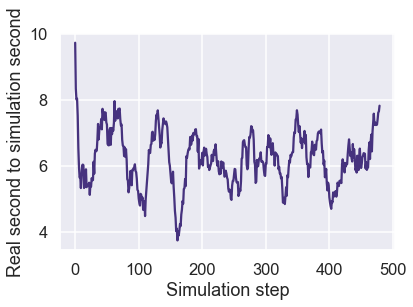

In [10]:
#f = sns.lineplot(index, time_diff)
# f.hlines(y=[2,4], xmin=0, xmax=500)
running_mean = np.convolve(time_diff, np.ones(20), 'valid') / 20
f = sns.lineplot(index[0:len(running_mean)], running_mean)
f.set_xlabel('Simulation step')
f.set_ylabel('Real second to simulation second')

In [11]:
fba['estimated_exchange_dmdt'].keys()

dict_keys(['CPD0-2167[c]', 'CPD-564[c]', 'WATER[p]', 'GLC[p]', 'D-LACTATE[p]', 'ETOH[p]', 'UNDECAPRENYL-DIPHOSPHATE[p]', 'CARBON-MONOXIDE[p]', 'CO+2[p]', 'S-ADENOSYL-4-METHYLTHIO-2-OXOBUTANOATE[c]', 'MG+2[p]', 'CARBON-DIOXIDE[p]', 'ZN+2[p]', 'CPD-560[p]', 'NI+2[p]', 'PROTON[p]', 'MI-PENTAKISPHOSPHATE[p]', 'ACET[p]', 'Pi[p]', 'CPD-1772[c]', 'URACIL[p]', 'GLYCOLLATE[c]', 'AMMONIUM[c]', 'OXYGEN-MOLECULE[p]', 'GLYCOLALDEHYDE[c]', 'CPD-534[p]', 'THYMINE[p]', 'CPD-10774[p]', 'GLYCEROL[p]', 'HYDROGEN-MOLECULE[c]', 'UREA[p]', 'L-SELENOCYSTEINE[c]', 'XANTHINE[p]', 'CA+2[p]', 'FE+2[p]', 'CPD-239[p]', 'BUTANAL[c]', 'INDOLE[p]', 'CH33ADO[c]', 'D-ALANINE[p]', 'NA+[p]', 'CPD-108[p]', 'SUC[p]', 'MN+2[p]', 'HYPOXANTHINE[p]', 'METOH[p]', 'K+[p]', 'FORMATE[p]', 'BETAINE[p]', 'CL-[p]', 'SULFATE[p]'])

In [12]:
sorted_exchange = pd.DataFrame(fba['estimated_exchange_dmdt']).sort_values(by=24, axis=1)
sorted_exchange.head()

WATER[p]   GLC[p]  AMMONIUM[c]  K+[p]  MG+2[p]  CL-[p]  FORMATE[p]  \
0   -469976  -829677       -51019      2        0      -5      115534   
1  -1129525 -2374325      -564318      8        0     -32      325237   
2  -3318488 -2547794      -738896  -5605     -249    -193      183570   
3  -4993553 -2626890      -908585 -10124     -450    -300       59196   
4  -6432013 -2636985     -1049825 -13898     -618    -411        6207   

   CPD0-2167[c]  URACIL[p]  THYMINE[p]  ...  SULFATE[p]  CPD-560[p]  \
0           291        153          73  ...           5          -4   
1            30        -94         -96  ...          34         212   
2          -208        -76        -112  ...         164         -32   
3            90        -66         -60  ...          30          99   
4           -19        -33         224  ...          25         145   

   UNDECAPRENYL-DIPHOSPHATE[p]  GLYCEROL[p]  D-ALANINE[p]  SUC[p]  \
0                            0       301346         54722  177927   
1                           21       963602            -5  408864   
2                           86       913158        118215  546746   
3                           84       838880        273917  628764   
4                          156       756513        438131  690984   

   CARBON-DIOXIDE[p]  ACET[p]  HYDROGEN-MOLECULE[c]  PROTON[p]  
0             533783   696026                797253    1524499  
1            2201102  2649414               4085766    4318689  
2            2303929  2728901               4315697    4687718  
3            2303938  2672042               4353677    4850243  
4            2198012  2586002               4246233    4976380  

[5 rows x 51 columns]

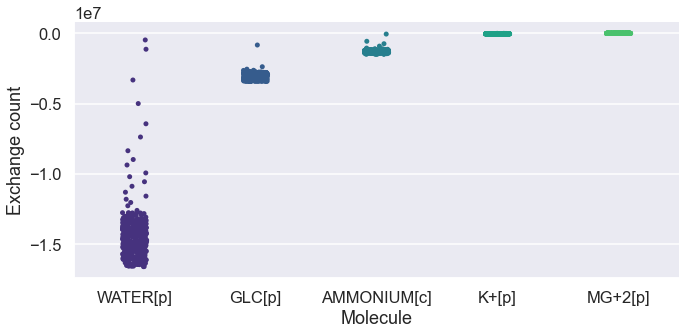

In [13]:
sns.catplot(y="Exchange count", x="Molecule", data=sorted_exchange.iloc[:,0:5].melt(var_name="Molecule", value_name="Exchange count"), aspect=2)

In [14]:
# fba['solution_residuals']['futile_cycle']

# Mass

<AxesSubplot:>

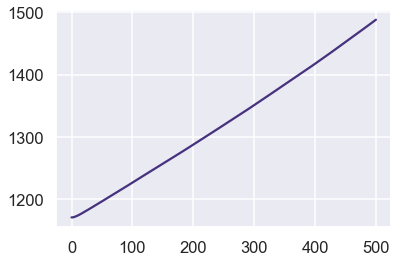

In [15]:
sns.lineplot(x=[i for i in range(len(mass['cell_mass']))],y=mass['cell_mass'])

# Meeting homeostatic objective

In [16]:
df1 = pd.DataFrame(fba['estimated_homeostatic_dmdt'])
df1.head()
# df1

2-3-DIHYDROXYBENZOATE[c]  2-KETOGLUTARATE[c]  2-PG[c]  \
0                        13                 -10       -1   
1                        39                 -27      -17   
2                        60                 -20      -72   
3                       -15                  76       55   
4                        21                  61       18   

   2K-4CH3-PENTANOATE[c]  4-AMINO-BUTYRATE[c]  4-hydroxybenzoate[c]  \
0                     -1                   -1                     2   
1                    -23                   -5                   -38   
2                     -3                  -20                     6   
3                     29                   56                    11   
4                     13                   39                   -83   

   ACETOACETYL-COA[c]  ACETYL-COA[c]  ACETYL-P[c]  ADENINE[c]  ...  \
0                   1              4            4          -2  ...   
1                 331            -24          -12        -155  ...   
2                  34             90           42          93  ...   
3                   4            114          103         -60  ...   
4                  10            160          156          29  ...   

   glycogen-monomer[c]  NI+2[p]  CO+2[p]  FE+2[p]  ZN+2[p]  MN+2[p]  NA+[p]  \
0                   -2        0        0        6        0        0       0   
1                   63        0        0        5        0        0      -1   
2                 3692        1        4       13        1       -2       1   
3                 6938        3        7      -18        3       -2       9   
4                 9479        6       11       -5        6        0      13   

   OXYGEN-MOLECULE[p]  CA+2[p]  Pi[p]  
0                 -32        0      8  
1                   3       15     12  
2                -136      -44     -5  
3                 143      -64    -13  
4                  28      -70     14  

[5 rows x 171 columns]

In [17]:
df1 = df1.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='update')


In [18]:
pd.DataFrame(fba['target_homeostatic_dmdt']).head()

2-3-DIHYDROXYBENZOATE[c]  2-KETOGLUTARATE[c]  2-PG[c]  \
0                         0                   0        0   
1                       -13                  10        1   
2                       -44                  58       24   
3                       -90                 115      105   
4                       -55                  89       63   

   2K-4CH3-PENTANOATE[c]  4-AMINO-BUTYRATE[c]  4-hydroxybenzoate[c]  \
0                      0                    0                     0   
1                      1                    1                    -2   
2                     32                   24                    39   
3                     49                   76                    39   
4                     40                   63                    35   

   ACETOACETYL-COA[c]  ACETYL-COA[c]  ACETYL-P[c]  ADENINE[c]  ...  \
0                   0              1            1           1  ...   
1                 360             -3           -3           3  ...   
2                  31             82           71         159  ...   
3                   0            103          141          67  ...   
4                  -1            141          191         127  ...   

   glycogen-monomer[c]  NI+2[p]  CO+2[p]  FE+2[p]  ZN+2[p]  MN+2[p]  NA+[p]  \
0                   -1        0        0        0        0        0       0   
1                   -4        0        0       -6        0        0       0   
2                 3767        6        6       -5        6        6       7   
3                 6975       16       13       -7       16       19      17   
4                 9520       27       20       25       27       35      22   

   OXYGEN-MOLECULE[p]  CA+2[p]  Pi[p]  
0                   0        0      0  
1                  64       22     -2  
2                  66       13     -8  
3                 214       67      8  
4                  85      146     35  

[5 rows x 171 columns]

In [19]:
df2 = pd.DataFrame(fba['target_homeostatic_dmdt'])
df2 = df2.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='target')
df2

index timestep  target
0      2-3-DIHYDROXYBENZOATE[c]        0       0
1            2-KETOGLUTARATE[c]        0       0
2                       2-PG[c]        0       0
3         2K-4CH3-PENTANOATE[c]        0       0
4           4-AMINO-BUTYRATE[c]        0       0
...                         ...      ...     ...
85495                   MN+2[p]      499     215
85496                    NA+[p]      499      56
85497        OXYGEN-MOLECULE[p]      499     158
85498                   CA+2[p]      499    1099
85499                     Pi[p]      499     146

[85500 rows x 3 columns]

In [20]:
df3 = df1.merge(df2, left_on=['index', 'timestep'], right_on=['index', 'timestep'])
# df3[df3['timestep'] == 900].T
df3

df3['update'] = df3['update'].abs() 
df3['target'] = df3['target'].abs() 

df3['update'] = np.log10(df3['update'])
df3['target'] = np.log10(df3['target'])
df3['diff'] = df3['target'] - df3['update']

df3

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


index timestep    update    target      diff
0      2-3-DIHYDROXYBENZOATE[c]        0  1.113943      -inf      -inf
1            2-KETOGLUTARATE[c]        0  1.000000      -inf      -inf
2                       2-PG[c]        0  0.000000      -inf      -inf
3         2K-4CH3-PENTANOATE[c]        0  0.000000      -inf      -inf
4           4-AMINO-BUTYRATE[c]        0  0.000000      -inf      -inf
...                         ...      ...       ...       ...       ...
85495                   MN+2[p]      499  1.602060  2.332438  0.730378
85496                    NA+[p]      499  1.255273  1.748188  0.492916
85497        OXYGEN-MOLECULE[p]      499  0.778151  2.198657  1.420506
85498                   CA+2[p]      499  1.591065  3.040998  1.449933
85499                     Pi[p]      499  1.672098  2.164353  0.492255

[85500 rows x 5 columns]

In [21]:
df3_subset = df3[df3['timestep'].isin([0, 1, 2, 10, 24, 100])]

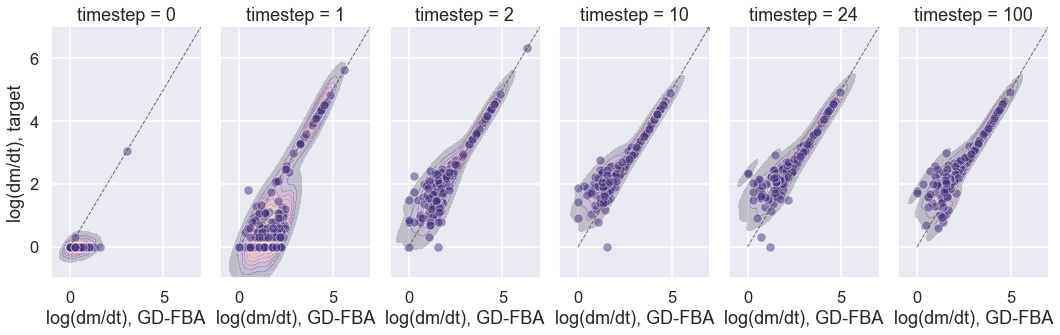

In [22]:
g = sns.FacetGrid(df3_subset, col="timestep", col_wrap=6, aspect=0.5, height=5, xlim=(-1,7), ylim=(-1,7))
g.map(sns.kdeplot, "update", "target", cmap="inferno", alpha=0.2, fill=True)
g.map(sns.scatterplot, "update", "target", alpha=0.5)
g.set_axis_labels("log(dm/dt), GD-FBA","log(dm/dt), target")

for ax in g.axes:
    ax.plot([0, 9], [0, 9], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    

plt.margins(0,0)

## Outliers?

In [23]:
df4 = df3.loc[df3['timestep'] == 25].reset_index(drop=True)
outliers = list(df4.loc[df4['diff']>0.5, 'index'])

<AxesSubplot:xlabel='diff', ylabel='Count'>

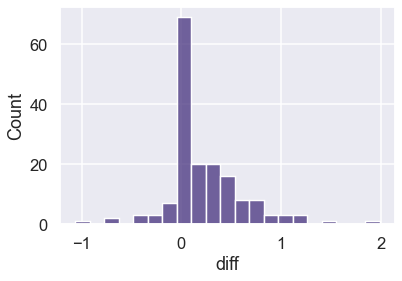

In [24]:
sns.histplot(x='diff', data=df4)

In [25]:
outliers

['2-3-DIHYDROXYBENZOATE[c]',
 '4-hydroxybenzoate[c]',
 'ADENINE[c]',
 'ADENOSINE[c]',
 'ADP-D-GLUCOSE[c]',
 'BIOTIN[c]',
 'CAMP[c]',
 'CO+2[c]',
 'CYTOSINE[c]',
 'D-ALA-D-ALA[c]',
 'DAMP[c]',
 'DGMP[c]',
 'FAD[c]',
 'GLUCONATE[c]',
 'GUANOSINE[c]',
 'HISTIDINOL[c]',
 'L-ARGININO-SUCCINATE[c]',
 'METHYLENE-THF[c]',
 'N-ACETYL-D-GLUCOSAMINE-1-P[c]',
 'NADPH[c]',
 'OXALACETIC_ACID[c]',
 'PANTOTHENATE[c]',
 'PROTOHEME[c]',
 'S-ADENOSYLMETHIONINE[c]',
 'SHIKIMATE[c]',
 'SIROHEME[c]',
 'TDP[c]',
 'THF[c]',
 'UNDECAPRENYL-DIPHOSPHATE[c]',
 'NI+2[p]',
 'FE+2[p]',
 'ZN+2[p]',
 'MN+2[p]',
 'OXYGEN-MOLECULE[p]',
 'CA+2[p]']

In [26]:
homeostatic

NameError: name 'homeostatic' is not defined

Doesn't look like they're going into negative at least. Are they being used?

## Usage

In [ ]:
df5 = df3.loc[df3['timestep'] > 25].reset_index(drop=True)
outlier_time = df5[df5['index'].isin(outliers)]

In [ ]:
plt.figure(figsize=[20,10])
sns.lineplot(x='timestep', y='diff', hue='index', data=outlier_time, legend=False)

I would guess that they're just not incentivized enough to reach their target completely. 

# Glucose transport

In [ ]:


stoichiometry[1]

In [ ]:
estimated_fluxes = pd.DataFrame(fba['estimated_fluxes'])
estimated_fluxes

In [ ]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])
cycle = fluxes.loc[:,['RXN0-7209-GLC//GLC.9.','RXN0-7247-GLC//GLC.9.']]
cycle.head()

cycle.columns = ['A->B', 'B->A']

In [ ]:
sns.catplot(y="Flux (counts)", x="Reaction", data=cycle.melt(var_name="Reaction", value_name="Flux (counts)"), aspect=2)

In [ ]:
for reaction in stoichiometry:
    if 'GLC[p]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:5],sep='\n')
        
# for reaction in stoichiometry:
#     if 'GLC[p]' in reaction['stoichiometry'].keys():
#         print(reaction['reaction id'], reaction['stoichiometry'],sep='\n')

We should look at the following:

In [ ]:
glucose_transport_reactions = ['TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.',
                               'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.',
                               'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.',
                               'RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.',
                               'RXN0-7077-GLC/PROTON//Glucopyranose/PROTON.33.',
                               'RXN0-7077-GLC/PROTON//GLC/PROTON.23.',
                               'TRANS-RXN0-574-GLC//GLC.9.',
                               'TRANS-RXN0-574-GLC//Glucopyranose.19.',
                               'TRANS-RXN-320-GLC/ATP/WATER//ALPHA-GLUCOSE/ADP/Pi/PROTON.43.',
                               'TRANS-RXN-320-GLC/ATP/WATER//GLC/ADP/Pi/PROTON.33.',
                               'TRANS-RXN-320-GLC/ATP/WATER//Glucopyranose/ADP/Pi/PROTON.43.']

In [ ]:
for reaction in stoichiometry:
    if reaction['reaction id'] in glucose_transport_reactions:
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:5],sep='\n')

# How much glucose is being used?

In [ ]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])
influx = fluxes.loc[:,glucose_transport_reactions]
influx.head()

influx.columns = ['PTS-1', 'PTS-2', 'PTS-3', 'DIF-1', 'DIF-2', 'DIF-3', 'DIF-4', 'DIF-5', 'DUP-1', 'DUP-2', 'DUP-3']

In [ ]:
sns.catplot(y="Exchange count", x="Molecule", data=influx.melt(var_name="Molecule", value_name="Exchange count"), aspect=2)

In [ ]:
influx.sum(axis=1)

In [ ]:
exchanges = pd.DataFrame(fba['estimated_exchange_dmdt'])
exchanges['GLC[p]']

Looks like that's all of it.

## What's the flux coming from Glc[p]?

In [ ]:
sol_fluxes = pd.DataFrame(fba['solution_fluxes'])
sol_fluxes.loc[:,glucose_transport_reactions]

In [27]:
pd.DataFrame(fba['estimated_fluxes']).head()

1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN  1.1.1.127-RXN  \
0                                   -1            -14   
1                                   -2            -34   
2                                  -13             59   
3                                   -7            -27   
4                                  -15              3   

   1.1.1.215-RXN (reverse)  1.1.1.251-RXN  1.1.1.271-RXN (reverse)  \
0                        3              3                        1   
1                        9             14                       40   
2                        2            172                       44   
3                       11             55                       43   
4                       -3             42                       -1   

   1.1.1.274-RXN (reverse)  1.1.1.283-RXN (reverse)  1.1.1.39-RXN  \
0                       -1                        0           -10   
1                       -1                      -15           -18   
2                       -8                      -19           -76   
3                       -3                       -7           -19   
4                       -1                      -11           -28   

   1.1.1.83-RXN  1.11.1.15-RXN  ...  XYLISOM-RXN  \
0             0              1  ...           77   
1            -2             -1  ...          102   
2             8             38  ...          143   
3             0              4  ...           92   
4           -43              0  ...           90   

   XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.  \
0                                      80050   
1                                      69385   
2                                      66058   
3                                      62984   
4                                      60315   

   XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.  XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.  \
0                                -239801                              159688   
1                                -207905                              138428   
2                                -197776                              131745   
3                                -188727                              125656   
4                                -180763                              120354   

   XYLONATE-DEHYDRATASE-RXN  XYLULOKIN-RXN  YIAE1-RXN (reverse)  \
0                         8             17                    5   
1                        41             12                   15   
2                       314            191                  -11   
3                        62              7                   19   
4                        27              0                   -9   

   YIAE2-RXN (reverse)  glycogen-monomer-extension  maintenance_reaction  
0                   -1                          -2               1971173  
1                   -1                          63               7128363  
2                  -11                        3692               7679640  
3                    0                        6938               7652296  
4                   -1                        9479               7633118  

[5 rows x 4688 columns]

# Hmm

In [28]:
for reaction in stoichiometry:
    if 'CPD-564[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:5],sep='\n')

ADENOSYLHOMOCYSTEINE-NUCLEOSIDASE-RXN
{'ADENOSYL-HOMO-CYS[c]': -1, 'WATER[c]': -1, 'CPD-564[c]': 1, 'ADENINE[c]': 1}
[0, 499, -50, 224, 786]
RIBOSYLHOMOCYSTEINASE-RXN
{'CPD-564[c]': -1, 'HOMO-CYS[c]': 1, 'DIHYDROXYPENTANEDIONE[c]': 1}
[7, 514, -23, 67, 809]
TRANS-RXN0-265-CPD-564//CPD-564.17.
{'CPD-564[c]': -1, 'CPD-564[p]': 1}
[-3, -6, -11, 9, -6]


In [29]:
for reaction in stoichiometry:
    if 'DIHYDROXYPENTANEDIONE[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:5],sep='\n')

RIBOSYLHOMOCYSTEINASE-RXN
{'CPD-564[c]': -1, 'HOMO-CYS[c]': 1, 'DIHYDROXYPENTANEDIONE[c]': 1}
[7, 514, -23, 67, 809]
RXN-10015
{'DIHYDROXYPENTANEDIONE[c]': -1, 'CPD-10773[c]': 1}
[0, -78, -8, 8, -8]
RXN-10016
{'DIHYDROXYPENTANEDIONE[c]': -1, 'CPD-10775[c]': 1}
[-1, 0, -29, 2, -1]
RXN0-5461
{'DIHYDROXYPENTANEDIONE[c]': -1, 'ATP[c]': -1, 'CPD-10551[c]': 1, 'ADP[c]': 1, 'PROTON[c]': 1}
[10, 591, 3, 49, 818]


In [30]:
for reaction in stoichiometry:
    if 'CPD-10551[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:5],sep='\n')

RXN-15216
{'CPD-10551[c]': -1, 'CPD0-2467[c]': 1}
[13, 612, 30, 88, 875]
RXN0-5461
{'DIHYDROXYPENTANEDIONE[c]': -1, 'ATP[c]': -1, 'CPD-10551[c]': 1, 'ADP[c]': 1, 'PROTON[c]': 1}
[10, 591, 3, 49, 818]


In [31]:
for reaction in stoichiometry:
    if 'CPD0-2467[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:5],sep='\n')

RXN-15216
{'CPD-10551[c]': -1, 'CPD0-2467[c]': 1}
[13, 612, 30, 88, 875]
RXN-15943 (reverse)
{'DIHYDROXY-ACETONE-PHOSPHATE[c]': 1, 'ACETYL-COA[c]': 1, 'CPD0-2467[c]': -1, 'CO-A[c]': -1}
[20, 661, 164, 198, 992]
RXN0-6720
{'CPD0-2467[c]': -1, 'WATER[c]': -1, 'CPD0-2468[c]': 1}
[-4, -24, -106, -58, -59]


## Get top fluxes

In [32]:
top_fluxes = list(fluxes.sort_values(axis=1, by=49, ascending=False).columns[0:50])
top_fluxes

NameError: name 'fluxes' is not defined

In [33]:
df3[df3['index'].isin(top_fluxes)]

NameError: name 'top_fluxes' is not defined

# Check target goal

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

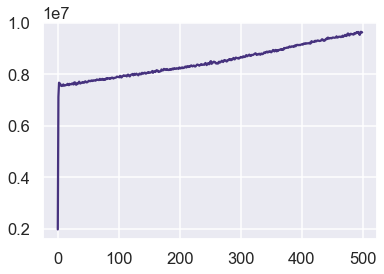

In [34]:
maintenance = fba['estimated_fluxes']['maintenance_reaction']
sns.lineplot([i for i in range(len(maintenance))], maintenance)

In [35]:
bulk_data = bulk.iloc[-1, :]
bulk_data

CPLX-125[c]          7
CPLX-172[c]          0
CPLX0-226[c]       166
CPLX0-228[c]        18
CPLX0-7669[c]      130
                  ... 
undecaprenyl[m]      0
undecaprenyl[o]      0
undecaprenyl[p]      0
undecaprenyl[l]      0
undecaprenyl[i]      0
Name: 500, Length: 40889, dtype: int64

In [36]:
min(flux_data)

NameError: name 'flux_data' is not defined

In [37]:
flux_data = pd.DataFrame(fba['estimated_fluxes']).iloc[-1, :]

In [38]:
# scaler = StandardScaler()
# flux_values = scaler.fit_transform(np.array(flux_data).reshape(-1, 1)).reshape(-1)
scaler = MinMaxScaler(feature_range=(-1, max(flux_data)/(abs(min(flux_data)))))
flux_values = scaler.fit_transform(np.array(flux_data).reshape(-1, 1)).reshape(-1)
flux_data.iloc[:] = flux_values.tolist()

flux_data

1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN    1.581080e-06
1.1.1.127-RXN                          2.389187e-05
1.1.1.215-RXN (reverse)               -3.689186e-06
1.1.1.251-RXN                          4.954050e-05
1.1.1.271-RXN (reverse)                7.027022e-06
                                           ...     
XYLULOKIN-RXN                          1.721620e-05
YIAE1-RXN (reverse)                   -3.513511e-07
YIAE2-RXN (reverse)                   -1.405404e-06
glycogen-monomer-extension             4.603753e-03
maintenance_reaction                   1.693117e+00
Name: 499, Length: 4688, dtype: float64

In [39]:
cofactors = [
 'PROTON[c]',
 'WATER[c]',
 'OXYGEN-MOLECULE[c]',
 'PROTON[p]',
 'WATER[p]',
 'Pi[c]',
 'PPI[c]',
 'Pi[p]']

In [40]:
G = nx.Graph()

for reaction in stoichiometry:
    for metabolite in list(reaction['stoichiometry'].keys()):
        if metabolite in bulk_data.index:
            G.add_node(metabolite, size=20*np.log(100+abs(bulk_data[metabolite])))
        else:
            G.add_node(metabolite, size=10)

    for reactant in list(reaction['stoichiometry'].keys()):
        if reaction['stoichiometry'][reactant] < 0:
            for product in list(reaction['stoichiometry'].keys()):
                if reaction['stoichiometry'][product] > 0:
                    if G.has_edge(reactant, product):
                        G.edges[reactant, product]['weight'] += 20*flux_data[reaction['reaction id']]
                    else:
                        G.add_edge(reactant, product, weight=20*flux_data[reaction['reaction id']])


                    
# prune smaller graphs away
for subgraph in [G.subgraph(c) for c in nx.connected_components(G)]:
    if subgraph.size() < 100:
        print(subgraph.nodes())
        # G.remove_nodes_from(subgraph.nodes())
        
# remove highly connected nodes (e.g. protons)
highly_connected_nodes = list()
for node in G.nodes():
    if G.degree(node) > 50:
        highly_connected_nodes.append(node)
        
# G.remove_nodes_from(highly_connected_nodes)
G.remove_nodes_from(cofactors)


['PHOSPHO-ARCB-ASP[CCI-PM-BAC-NEG-GN]', 'PHOSPHO-ARCB-HIS[CCI-PM-BAC-NEG-GN]', 'Pi[NIL]', 'ARCB-CPLX[CCI-PM-BAC-NEG-GN]', 'PHOSPHO-ARCB717[CCI-PM-BAC-NEG-GN]']
['BAES-MONOMER[CCI-PM-BAC-NEG-GN]', 'PHOSPHO-BAES[CCI-PM-BAC-NEG-GN]', 'BAER-MONOMER[c]', 'PHOSPHO-BAER[c]']
['D-ALANINE[CCI-PERI-BAC-GN]', 'Proteins-L-Threonines[CCI-PERI-BAC-GN]', 'MI-PENTAKISPHOSPHATE[CCI-PERI-BAC-GN]', 'UNDECAPRENYL-DIPHOSPHATE[CCI-PERI-BAC-GN]', 'CPD-9646[CCI-PERI-BAC-GN]', 'GDP[CCI-PERI-BAC-GN]', 'CPD-606[CCI-PERI-BAC-GN]', 'Protein-flavinated-threonines[CCI-PERI-BAC-GN]', 'ADP[CCI-PERI-BAC-GN]', 'CPD-18902[CCI-PERI-BAC-GN]', 'CPD-6746[CCI-PERI-BAC-GN]', 'CYTIDINE[CCI-PERI-BAC-GN]', 'FAD[CCI-PERI-BAC-GN]', 'WATER[CCI-PERI-BAC-GN]', 'CPD-17926[CCI-PERI-BAC-GN]', 'CPD-18903[CCI-PERI-BAC-GN]', 'GLYCEROL-3P[CCI-PERI-BAC-GN]', 'CPD-17927[CCI-PERI-BAC-GN]', 'PROTON[CCI-PERI-BAC-GN]', 'AMP[CCI-PERI-BAC-GN]', 'CPD-18901[CCI-PERI-BAC-GN]', 'GTP[CCI-PERI-BAC-GN]', 'ADENOSINE5TRIPHOSPHO5ADENOSINE[CCI-PERI-BAC-GN]', '

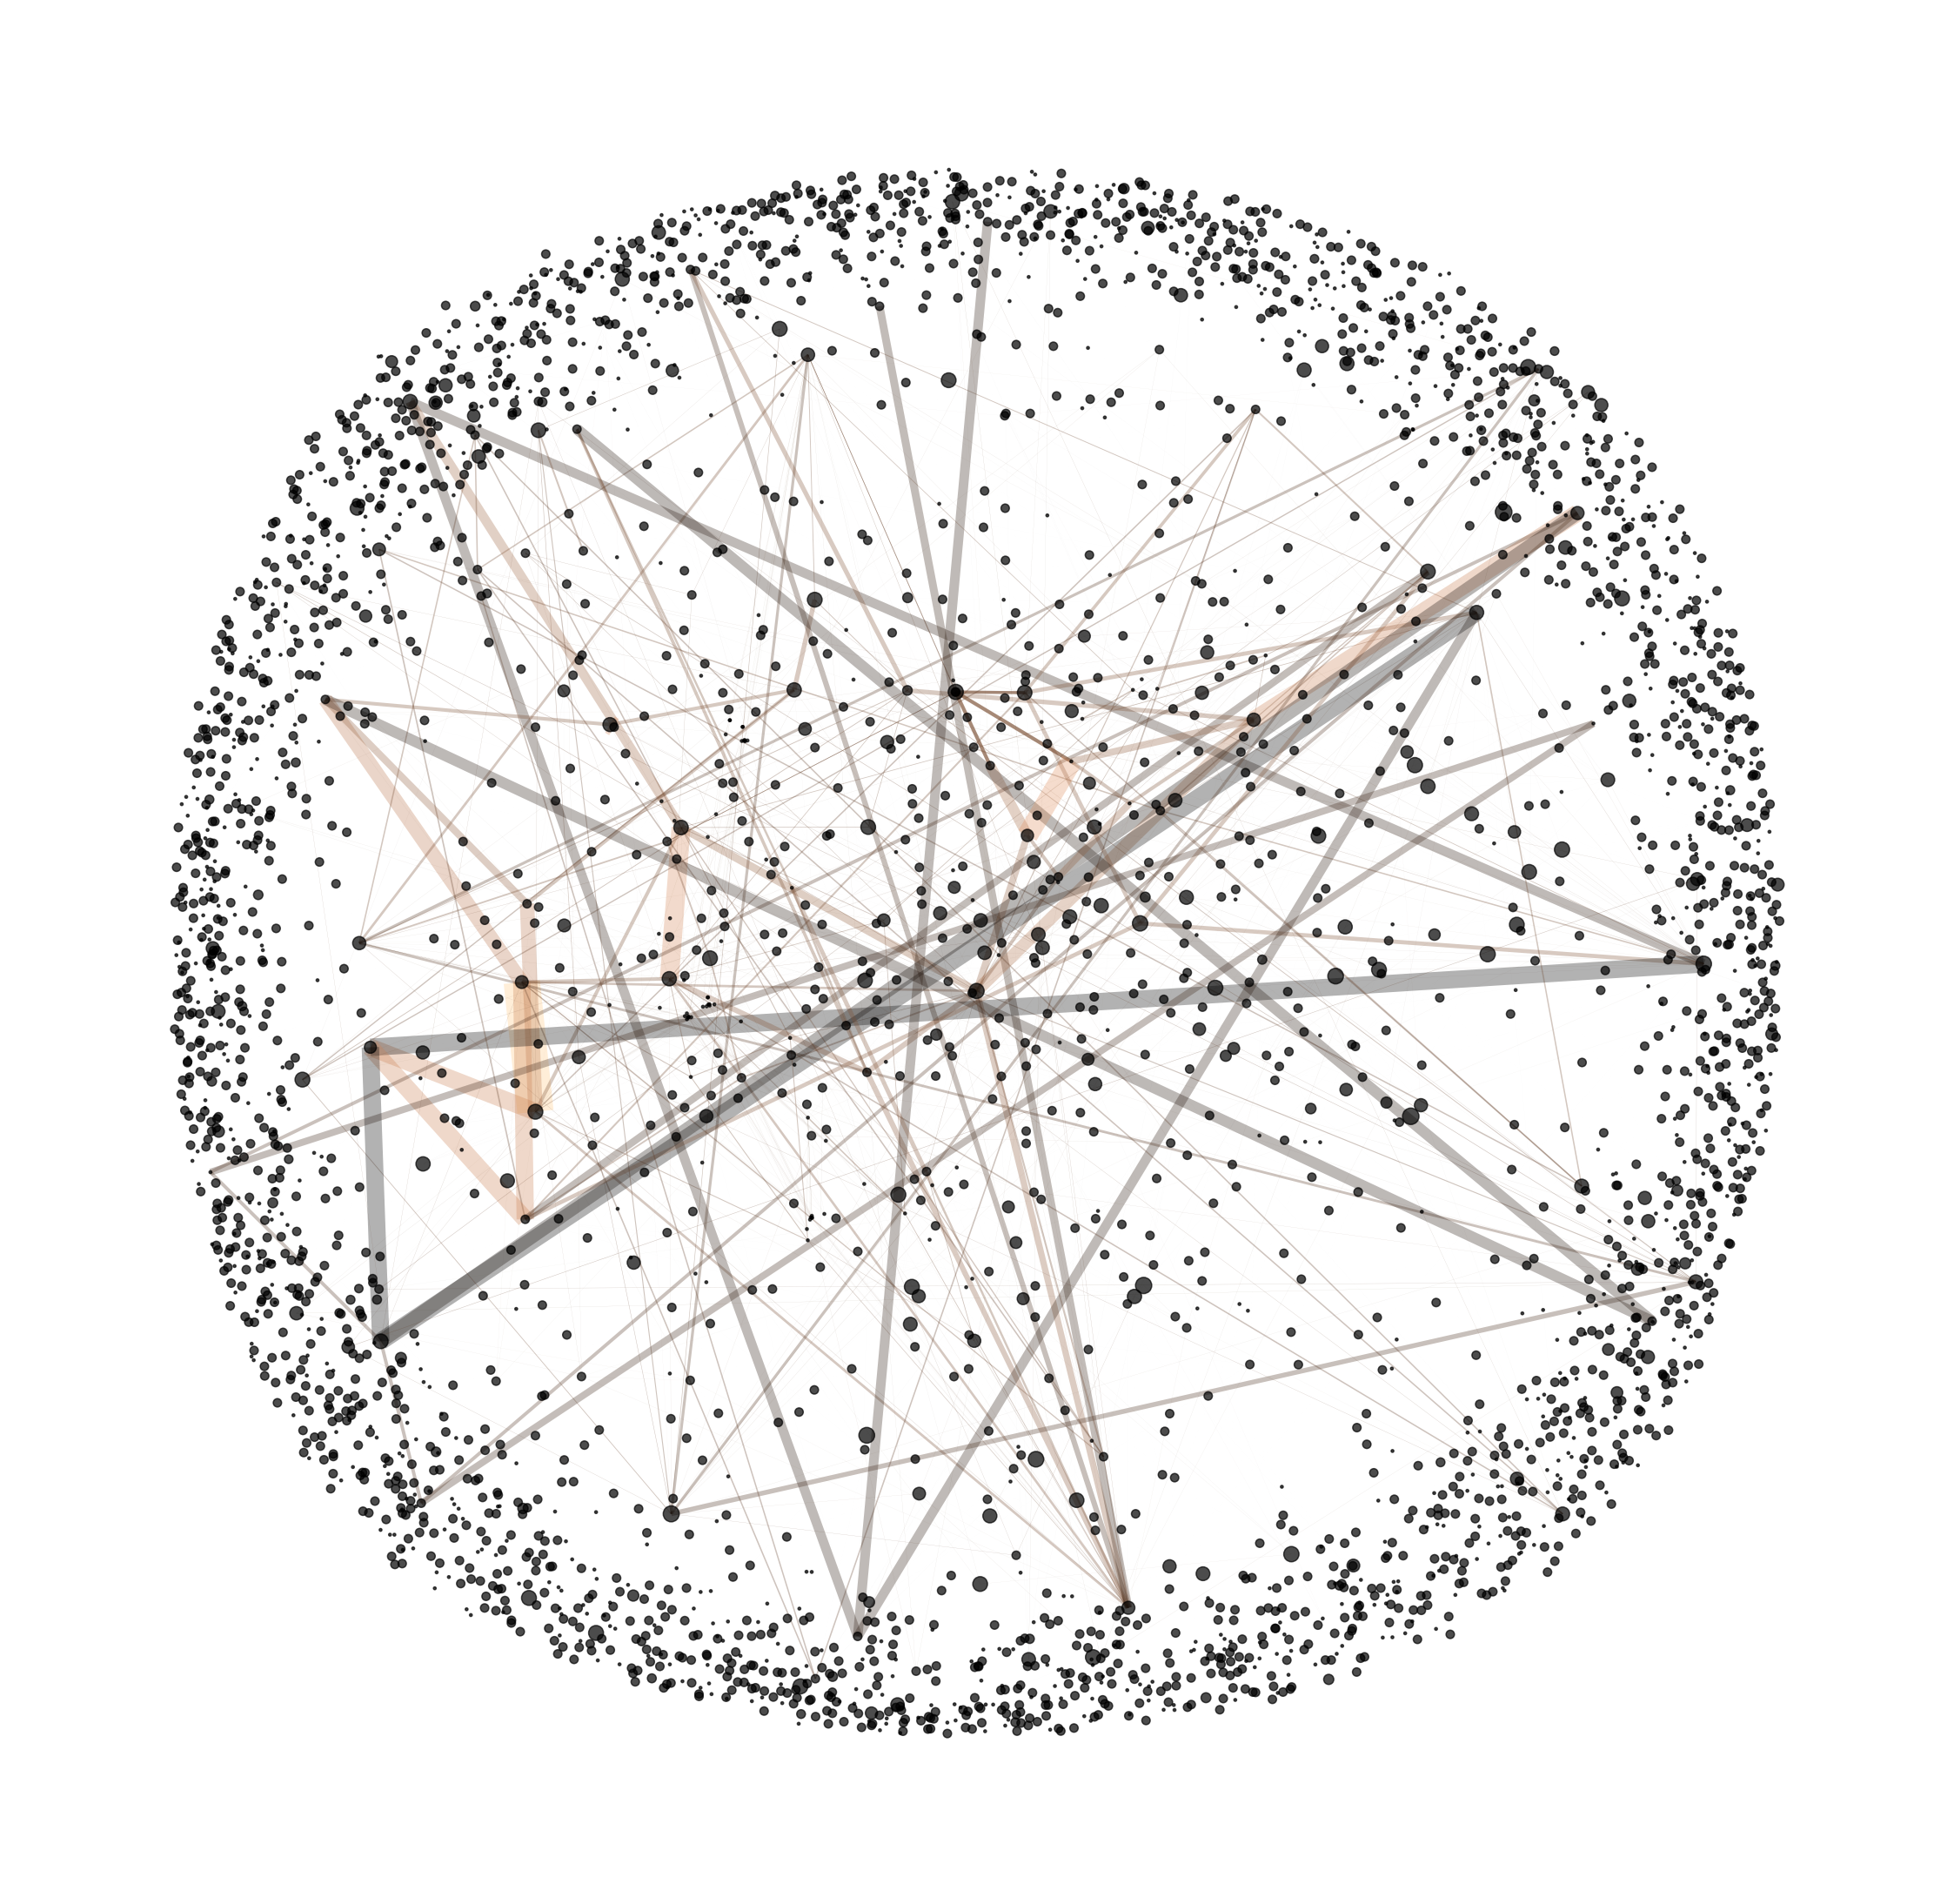

In [41]:
widths = nx.get_edge_attributes(G, 'weight')
sizes = nx.get_node_attributes(G, 'size')
nodelist = G.nodes()

plt.figure(figsize=(40,40))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=list(sizes.values()),
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color=list(widths.values()),
                       # edge_color='lightblue',
                       alpha=0.3,
                       edge_cmap=plt.cm.copper)
# nx.draw_networkx_labels(G, pos=pos,
#                         labels=dict(zip(nodelist,nodelist)),
#                         font_color='black')
plt.box(False)
plt.show()

# consider shell layout or multipartite

In [42]:
important_exchanges = pd.DataFrame(fba['estimated_exchange_dmdt']).iloc[-1, :]
important_exchanges = important_exchanges[abs(important_exchanges) > 1000]

important_homeostatic = pd.DataFrame(fba['estimated_homeostatic_dmdt']).iloc[-1, :]
important_homeostatic = important_homeostatic[abs(important_homeostatic) > 1000]

In [43]:
exchange_metabolites = set(important_exchanges.index).intersection(set(G.nodes()))
homeostatic_metabolites = set(important_homeostatic.index).intersection(set(G.nodes()))

# exchange_metabolites = set(fba['estimated_exchange_dmdt'].keys()).intersection(set(G.nodes()))
# homeostatic_metabolites = set(fba['estimated_homeostatic_dmdt'].keys()).intersection(set(G.nodes()))

In [44]:
shortest_paths = nx.multi_source_dijkstra_path_length(G, sources=exchange_metabolites, cutoff=None, weight=1)
shortest_paths_target = nx.multi_source_dijkstra_path_length(G, sources=homeostatic_metabolites, cutoff=None, weight=1)

In [45]:
n_bins = max(shortest_paths.values()) + 1

In [46]:
bins = [[] for x in range(n_bins)]

for key, value in shortest_paths.items():
    bins[value].append(key)

In [47]:
weird_nodes = set(G.nodes()) - set(shortest_paths.keys())
display_nodes = set(shortest_paths.keys()).intersection(set(G.nodes()))
G.remove_nodes_from(weird_nodes)

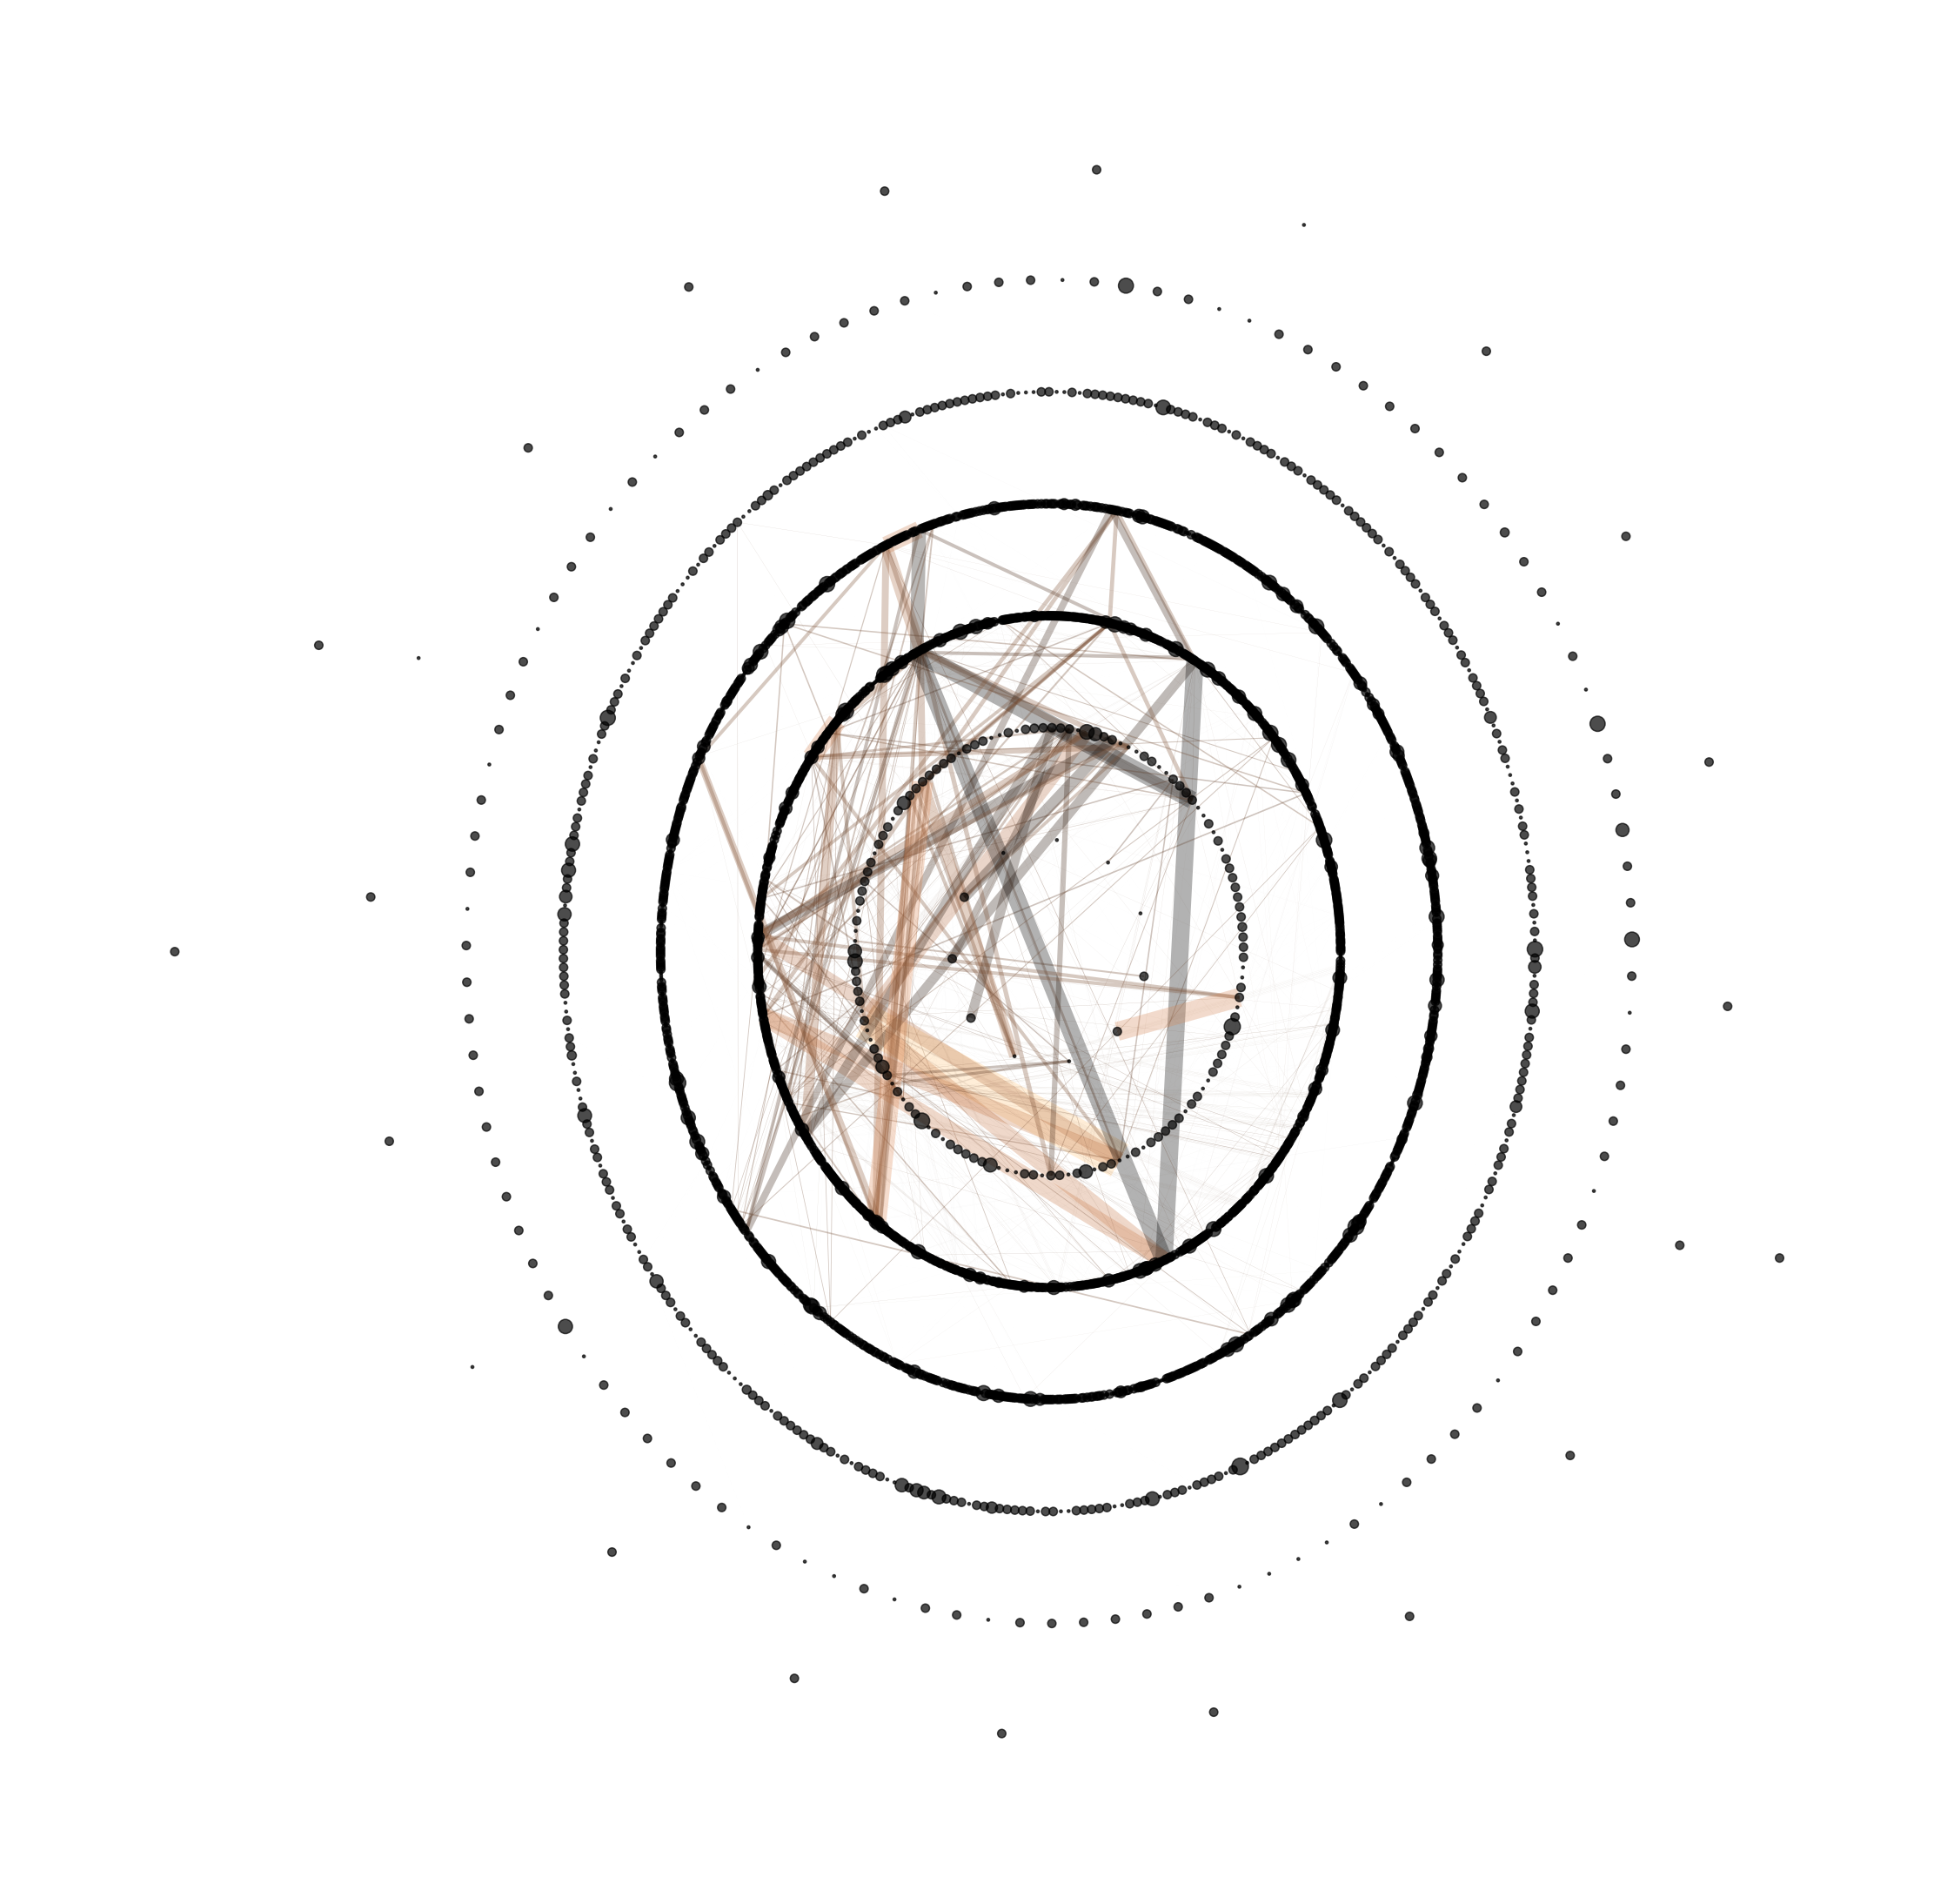

In [48]:
widths = nx.get_edge_attributes(G, 'weight')
sizes = nx.get_node_attributes(G.subgraph(display_nodes), 'size')
nodelist = display_nodes # G.nodes()

plt.figure(figsize=(40,40))

pos = nx.shell_layout(G, nlist=bins)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=list(sizes.values()),
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color=list(widths.values()),
                       # edge_color='lightblue',
                       alpha=0.3,
                       edge_cmap=plt.cm.copper)
# nx.draw_networkx_labels(G, pos=pos,
#                         labels=dict(zip(nodelist,nodelist)),
#                         font_color='black')
plt.box(False)
plt.show()

# consider shell layout or multipartite

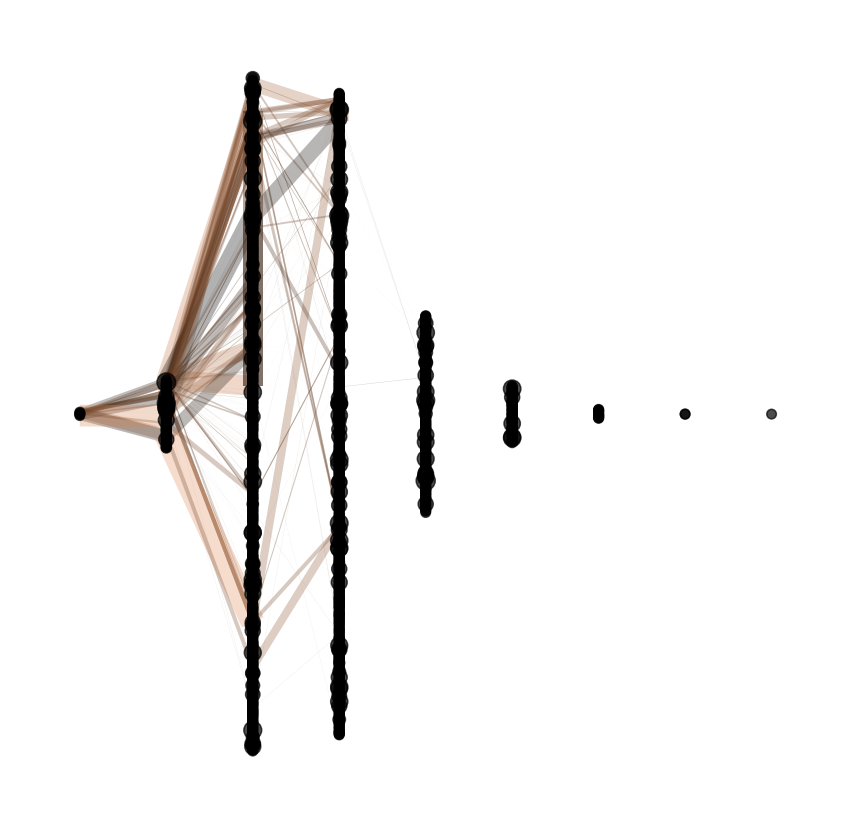

In [49]:
shortest_paths_dict = {key: {'layers': value} for key, value in shortest_paths.items()}

nx.set_node_attributes(G, shortest_paths_dict)

widths = nx.get_edge_attributes(G, 'weight')
sizes = nx.get_node_attributes(G.subgraph(display_nodes), 'size')
nodelist = display_nodes # G.nodes()

plt.figure(figsize=(15,15))

pos = nx.multipartite_layout(G, subset_key='layers')
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=list(sizes.values()),
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color=list(widths.values()),
                       # edge_color='lightblue',
                       alpha=0.3,
                       edge_cmap=plt.cm.copper)
# nx.draw_networkx_labels(G, pos=pos,
#                         labels=dict(zip(nodelist,nodelist)),
#                         font_color='black')
plt.box(False)
plt.show()

# consider shell layout or multipartite

In [50]:
n_bins_target = max(shortest_paths.values()) + 1

In [51]:
bins_dual = [[] for x in range(n_bins_target)]

for key, value in shortest_paths.items():
    if shortest_paths[key] < shortest_paths_target[key]:
        bins_dual[value].append(key)
    else:
        bins_dual[n_bins-1-shortest_paths_target[key]].append(key)

In [52]:
shortest_paths['PTSH-MONOMER[c]']

1

In [53]:
# remove low flux metabolites (unused)
low_flux_nodes = list()

for node in G.nodes():
    weight_sum = 0
    for edge in G.edges(node, data=True):
        weight_sum += edge[2]['weight']
    if weight_sum < 1 and weight_sum > -1: # modify
        low_flux_nodes.append(node)

high_flux_labels = {}    
for node in G.nodes():
    if node not in low_flux_nodes:
        high_flux_labels[node] = node

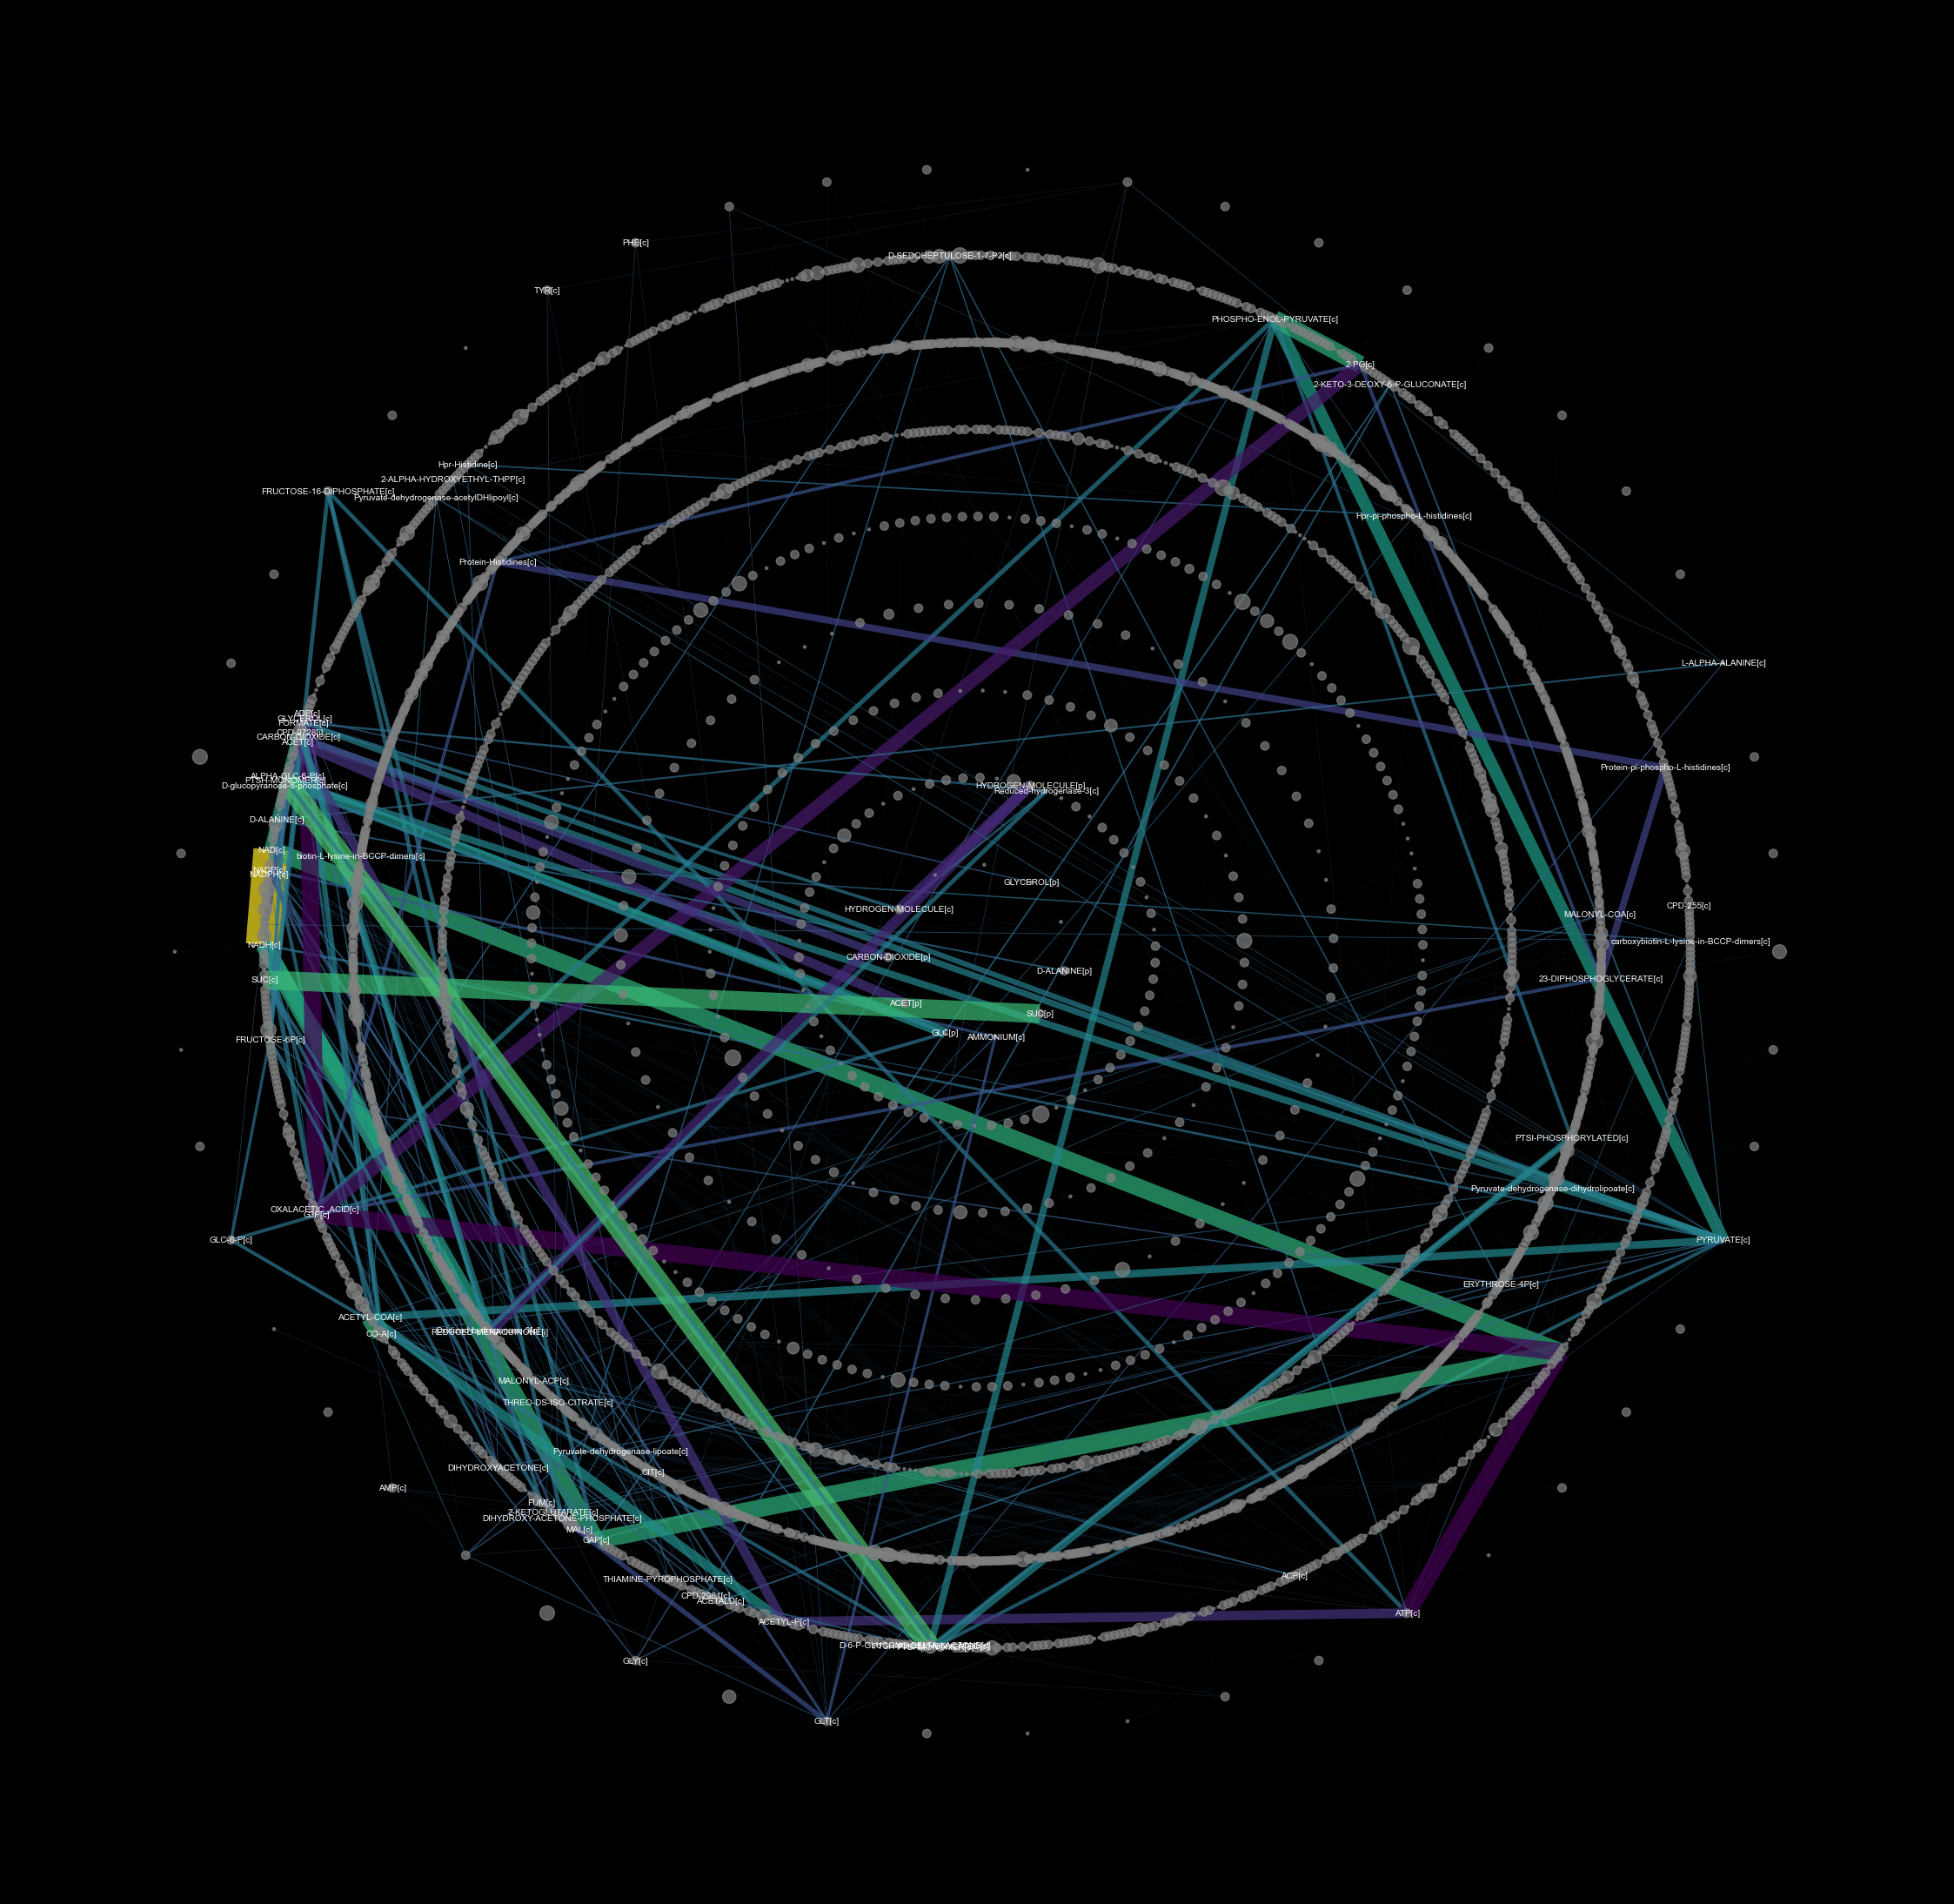

In [54]:
widths = nx.get_edge_attributes(G, 'weight')
sizes = nx.get_node_attributes(G.subgraph(display_nodes), 'size')
nodelist = display_nodes # G.nodes()

plt.figure(figsize=(40,40), facecolor='black')

pos = nx.shell_layout(G, nlist=bins_dual)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=list(sizes.values()),
                       node_color='grey',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color=list(widths.values()),
                       # edge_color='lightblue',
                       alpha=0.7,
                       edge_cmap=plt.cm.viridis)
nx.draw_networkx_labels(G, pos=pos,
                        labels=high_flux_labels,
                        font_color='white',
                        font_size=10)
plt.box(False)
plt.grid(False)
plt.show()

# consider shell layout or multipartite

In [55]:
shortest_paths_dict = {}

for i, bin_layer in enumerate(bins_dual):
    for key in bin_layer:
        shortest_paths_dict[key] = {'layers': i}